In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/Sentiment data.csv')

In [4]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [5]:
data.shape

(5842, 2)

In [6]:
X = data.iloc[:, 0]
y = data.iloc[:, -1]

In [7]:
X

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object

In [8]:
y

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
vectorizer = CountVectorizer(stop_words= 'english')

In [11]:
X = vectorizer.fit_transform(X)

In [12]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
vectorizer.vocabulary_

{'geosolutions': 4574,
 'technology': 9925,
 'leverage': 6016,
 'benefon': 1650,
 'gps': 4666,
 'solutions': 9322,
 'providing': 7959,
 'location': 6142,
 'based': 1569,
 'search': 8905,
 'communities': 2487,
 'platform': 7623,
 'relevant': 8333,
 'multimedia': 6765,
 'content': 2657,
 'new': 6890,
 'powerful': 7750,
 'commercial': 2465,
 'model': 6652,
 'esi': 3700,
 'lows': 6208,
 '50': 532,
 'bk': 1726,
 'real': 8179,
 'possibility': 7724,
 'quarter': 8048,
 '2010': 255,
 'componenta': 2546,
 'net': 6876,
 'sales': 8758,
 'doubled': 3303,
 'eur131m': 3758,
 'eur76m': 3876,
 'period': 7482,
 'year': 11021,
 'earlier': 3420,
 'moved': 6734,
 'zero': 11070,
 'pre': 7768,
 'tax': 9900,
 'profit': 7884,
 'loss': 6188,
 'eur7m': 3877,
 'according': 884,
 'finnish': 4245,
 'russian': 8696,
 'chamber': 2230,
 'commerce': 2464,
 'major': 6302,
 'construction': 2640,
 'companies': 2490,
 'finland': 4240,
 'operating': 7149,
 'russia': 8695,
 'swedish': 9774,
 'buyout': 2001,
 'firm': 4255,
 '

In [14]:
len(vectorizer.vocabulary_)

11126

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 0)

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
mnb = MultinomialNB()

In [19]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [20]:
mnb.score(X_train, y_train)

0.8605341246290801

In [21]:
mnb.score(X_test, y_test)

0.6577686516084873

In [22]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


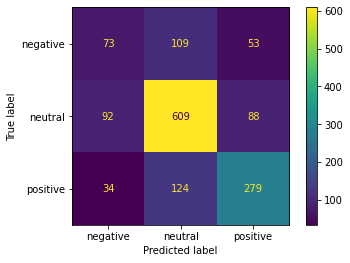

In [23]:
plot_confusion_matrix(mnb, X_test, y_test)

In [24]:
sample = 'the company has been very decrese in sales from last three months and debt for the company has been increased from last year'

In [25]:
sample = vectorizer.transform([sample])

In [26]:
mnb.predict(sample)

array(['positive'], dtype='<U8')